# Final Project for Data Analytics

## Alyssa June Pacleb, Ravi Goparaju, Adeena Amersi, Ryan Chiapoco

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline

# Science Giving Column Meanings and Types

Header | Definition | Type
---|---------|-------|
`cmte_nm` | Committee name | object
`cmte_id` | Committee identification, assigned | object
`cmte_tp` | Committee type. [List of committee type codes](https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/)  | object
<font size="5">**`cmte_pty`**</font>  | **Committee party. [List of party codes](https://www.fec.gov/campaign-finance-data/party-code-descriptions/)** | **object**
`cand_name` | Candidate name | object
`cand_pty_affiliation` | Political party affiliation reported by the candidate | object
`cand_office_st` | Candidate state | object
<font size="5">**`cand_office`**</font>  | Candidate office. H = House, P = President, S = Senate | object
`cand_office_district` | Candidate district | float64
`cand_status` | Candidate status. C = Statutory candidate, F = Statutory candidate for future election, N = Not yet a statutory candidate, P = Statutory candidate in prior cycle | object
`rpt_tp` | Report type. [Report type codes](https://www.fec.gov/campaign-finance-data/report-type-code-descriptions/) | object
<font size="5">**`transaction_pgi`**</font> | The code for which the contribution was made. EYYYY (election plus election year). P = Primary, G = General, O = Other, C = Convention, R = Runoff, S = Special, E = Recount | object
`transaction_tp` | Transaction type. [Type codes](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/) | object
`entity_tp` | Entity type. Only valid for electronic filings received after April 2002. CAN = Candidate, CCM = Candidate Committee, COM = Committee, IND = Individual (a person), ORG = Organization (not a committee and not a person), PAC = Political Action Committee, PTY = Party Organization | object
`cleaned_name` | Contributor/lender/transfer name | object
`city` | City/town | object
<font size="5">**`state`**</font> | State | object
`zip_code` | Zip code | object
`employer` | Employer | object
<font size="5">**`cleaned_occupation`**</font>  | Occupation | object
`classification` | Classification of occupation | object
`transaction_dt` | Transaction date (MMDDYYYY) | float64
<font size="5">**`cycle`**</font> | Election cycle | float64
`transaction_amt` | Transaction amount | float64
<font size="5">**`2016_dollars`**</font>  | Transation amount adjusted for inflation | float64
`other_id` | Other identification number. For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributor's FEC ID. | object
`tran_id` | Transaction ID | object
`file_num` | A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. Only valid for electronic filings. | float64
`memo_cd` | 'X' indicates that the amount is not to be included in the itemization total. | object
`memo_text` | A description of the activity. | object
`sub_id` | FEC record number | float64


In [3]:
# Don't Run this numerous times for the sake of time
url ='https://media.githubusercontent.com/media/fivethirtyeight/data/master/science-giving/science_federal_giving.csv'
df = pd.read_csv(url, error_bad_lines=False)
# df.to_csv('science_federal_giving.csv')

In [19]:
print(df.shape)
df.head()

(881793, 32)


,Unnamed: 0,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,...,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,0,AMERICAN WAY - DURANT 2012; THE,C00501452,S,REP,"DURANT, CLARK",REP,MI,S,0.0,...,3302012.0,2012.0,2500.0,2612.50,NaN,SA0108160812336,845273.0,NaN,NaN,1.010000e+18
1,1,A LOT OF PEOPLE FOR DAVE OBEY,C00017830,H,DEM,"OBEY, DAVID R",DEM,WI,H,7.0,...,4182007.0,2008.0,250.0,292.50,NaN,C34559,294636.0,NaN,NaN,4.070000e+18
2,2,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,...,6092016.0,2016.0,50.0,50.00,C00401224,VSH8VCDY4S4,1096417.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
3,3,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,...,8192012.0,2012.0,2500.0,2612.50,NaN,C6548162,863428.0,NaN,NaN,4.030000e+18
4,4,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,7.0,...,10292010.0,2010.0,250.0,273.25,NaN,C5156783,863417.0,NaN,NaN,4.030000e+18


# Data preprocessing

In [4]:
df['2016_dollars'] = pd.to_numeric(df['2016_dollars'])
donation_mns = df['2016_dollars'].mean()
df['2016_dollars'].fillna(donation_mns, inplace = True)
for n in df.columns:
    print(n, f'{100*df[n].isna().sum()/df.shape[0]:.2f}% records are NA')

#print(df.isna().sum()) # Clearly there is a bit of an issue here

Unnamed: 0 0.00% records are NA
cmte_nm 46.68% records are NA
cmte_id 46.68% records are NA
cmte_tp 46.68% records are NA
cmte_pty 46.70% records are NA
cand_name 56.47% records are NA
cand_pty_affiliation 56.48% records are NA
cand_office_st 56.47% records are NA
cand_office 56.47% records are NA
cand_office_district 56.48% records are NA
cand_status 56.48% records are NA
rpt_tp 46.68% records are NA
transaction_pgi 51.18% records are NA
transaction_tp 46.68% records are NA
entity_tp 46.68% records are NA
cleaned_name 46.68% records are NA
city 46.69% records are NA
state 46.75% records are NA
zip_code 46.74% records are NA
employer 46.94% records are NA
cleanedoccupation 46.68% records are NA
classification 46.68% records are NA
transaction_dt 46.68% records are NA
cycle 46.68% records are NA
transaction_amt 46.68% records are NA
2016_dollars 0.00% records are NA
other_id 88.84% records are NA
tran_id 46.68% records are NA
file_num 46.68% records are NA
memo_cd 99.62% records are NA


In [6]:
# These are realistically the only features we care about
new = df.drop(columns=['cand_name', 'cand_office_st', 'cleaned_name','cmte_nm', 'cmte_id' , 'cmte_tp', 'cand_office_district', 'transaction_amt', 'cand_status', 'rpt_tp', 'transaction_tp', 'tran_id', 'file_num', 'memo_cd', 'memo_text', 'sub_id', 'other_id', 'zip_code', "cand_name", 'entity_tp', 'city','transaction_dt'])

# I only want to look at the general presidential election donations
data = (new[new['transaction_pgi'] == 'G']) 
data = (data[data['cand_office'] == 'P'])
print(data.isna().sum()) 
print(data.shape)
data.head()

Unnamed: 0                0
cmte_pty                  0
cand_pty_affiliation      0
cand_office               0
transaction_pgi           0
state                   230
employer                272
cleanedoccupation         0
classification            0
cycle                     0
2016_dollars              0
dtype: int64
(85623, 11)


,Unnamed: 0,cmte_pty,cand_pty_affiliation,cand_office,transaction_pgi,state,employer,cleanedoccupation,classification,cycle,2016_dollars
1313,1313,IND,IND,P,G,NY,RETIRED,ENGINEER,Engineer,2010.0,566.61
1340,1340,IND,IND,P,G,LA,PEGASUS INTERNATIONAL,ENGINEER,Engineer,2010.0,336.60
2213,2213,IND,IND,P,G,LA,PEGASUS INTERNATIONAL,ENGINEER,Engineer,2010.0,327.90
3682,3682,LIB,LIB,P,G,TX,P.K.M.J.,ENGINEER,Engineer,2008.0,280.50
3683,3683,LIB,LIB,P,G,WA,MICROSOFT CORPORATION,SOFTWARE DEVELOPMENT ENGINEER,Engineer,2008.0,1178.10


In [7]:
# NOW do we take care of the missing state values or do we just delete those rows?
# delete the nan rows. 
copy = data.copy()
copy = copy.dropna()
print(copy.shape)
print(copy.isna().sum()) 
copy.head()

# copy is the original dataset with NAs removed

(85121, 11)
Unnamed: 0              0
cmte_pty                0
cand_pty_affiliation    0
cand_office             0
transaction_pgi         0
state                   0
employer                0
cleanedoccupation       0
classification          0
cycle                   0
2016_dollars            0
dtype: int64


,Unnamed: 0,cmte_pty,cand_pty_affiliation,cand_office,transaction_pgi,state,employer,cleanedoccupation,classification,cycle,2016_dollars
1313,1313,IND,IND,P,G,NY,RETIRED,ENGINEER,Engineer,2010.0,566.61
1340,1340,IND,IND,P,G,LA,PEGASUS INTERNATIONAL,ENGINEER,Engineer,2010.0,336.60
2213,2213,IND,IND,P,G,LA,PEGASUS INTERNATIONAL,ENGINEER,Engineer,2010.0,327.90
3682,3682,LIB,LIB,P,G,TX,P.K.M.J.,ENGINEER,Engineer,2008.0,280.50
3683,3683,LIB,LIB,P,G,WA,MICROSOFT CORPORATION,SOFTWARE DEVELOPMENT ENGINEER,Engineer,2008.0,1178.10


## Choosing the best features. 

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# wrote this module to compute feature importance scores
from bestfeatures import best_features

### Feature engineering for MLP classifier

#### First pass: reduce the number of unique values in the cleanedoccupation column
#### This will make the one-hot-encoding sklearn.neural_network.MLPClassifier() does under the hood result in a not-too-wide design matrix

In [9]:
df1 = copy.copy()

In [14]:
# initial feature importance
# working copy
best_features(df1)

X shape:  (85121, 9)
Y shape:  (85121,)
X_train =  (68096, 9)  y_train =  (68096,)
X_test =  (17025, 9)  y_test =  (17025,)
Feature cmte_pty: 0.444249
Feature cand_office: 0.001648
Feature transaction_pgi: 0.000000
Feature state: 0.025956
Feature employer: 0.119437
Feature cleanedoccupation: 0.054178
Feature classification: 0.011981
Feature cycle: 0.059405
Feature 2016_dollars: 0.127675


In [31]:
# try to replace classification/cleaned occupation: make a DataFrame to count frequency
freq = pd.DataFrame(columns=['occ','count'])
for n in df1['cleanedoccupation'].unique():
    num_recs = df1[df1['cleanedoccupation'] == n].count()[0]
    row = pd.DataFrame([pd.Series([n, num_recs], index=['occ','count'])])
    freq = pd.concat([row, freq], ignore_index = True)

In [32]:
# cutoff valid values by count percentile so that there are only 30ish categories
q = freq['count'].quantile(.99)
print(f'Cutoff is {q}')
print(freq[freq['count'] > q])

# print total records
print('total records: {}'.format(freq[freq['count'] > q]['count'].sum()))

Cutoff is 235.89999999999964
                                occ  count
2526                  MATHEMATICIAN    334
2556                   MATH TEACHER    319
2588           DIRECTOR ENGINEERING    237
2599                 DATA SCIENTIST    654
2602          PHYSICIAN & SCIENTIST    588
2660                      (CHEMIST)   1209
2668               ENGINEER - SALES    325
2677  CLINICAL LABORATORY SCIENTIST    277
2682             AEROSPACE ENGINEER    246
2700              COMPUTER ENGINEER    345
2708               ENGINEER NETWORK    552
2712            ENGINEERING MANAGER    773
2713                   STATISTICIAN    721
2716            ENGINEER MECHANICAL    431
2725                    ENGINEERING    519
2726             COMPUTER SCIENTIST    520
2727              CHEMICAL ENGINEER    390
2729            ELECTRICAL ENGINEER   1132
2736             RESEARCH SCIENTIST   1379
2738                      PHYSICIST   1204
2739               ENGINEER SYSTEMS   1029
2743                  GEO

In [33]:
# relabel malformed currentoccupation
labels = [
    ('ENGINEER - SALES', 'SALES ENGINEER'),
    ('(CHEMIST)', 'CHEMIST'),
    ('ENGINEER MECHANICAL', 'MECHANICAL ENGINEER'),
    ('ENGINEER (SOFTWARE)', 'SOFTWARE ENGINEER'),
    ('ENVIRONMENTAL /SCIENTIST', 'ENVIRONMENTAL SCIENTIST'),
    ('ENGINEER SYSTEMS', 'SYSTEMS ENGINEER'),
    ('GEO PHYSICIST', 'PHYSICIST'),
    ('ENGINEERING', 'ENGINEER')
]
for incorrect, correct in labels:
    freq.loc[freq['occ'] == incorrect, 'occ'] = correct

# make a set so we can filter the extraneous occupations (those who show up in < 236 records)
filter = set(freq[freq['count'] > q]['occ'])

#### Here we attempt a naive tokenization of the data: the idea is, given a occupation value that is not common (i.e. does not show up in > 236 records), we tokenize it using str.split(c) for every non-alphanumeric character c occuring in the dataset, and compare that with a tokenization of the 'main' occupations (those that show up in > 236 records). We count how many times a token of a non-common occupation is a subset of a token of a common occupation, and transform the non-common occupation to the 'main' occupation that maximizes this token overlap.

In [46]:
# tokenize the cleanedoccupation data
occ_corpus = df1.loc[~df1['cleanedoccupation'].isin(filter), 'cleanedoccupation'].unique()
chars = set()
for sent in occ_corpus:
    nonalphas = [c for c in sent if not(c.isalnum())]
    chars.update(nonalphas)
# see all non-alphanumeric chars
print(chars)
    
# attempt to split on all non-alpha chars, get tokens, count how many 
# match the tokens in each of the occupations that made the cutoff
valid_occs = df1.loc[df1['cleanedoccupation'].isin(filter), 'cleanedoccupation'].unique()
replace = {}
for occ in occ_corpus:
    current_best = 0
    best_pred_occ = 'OTHER'
    for v in valid_occs:
        num_overlaps = 0
        for c in chars:
            tokens, vtokens = occ.split(c), v.split(c)
            num_overlaps += sum([1/(len(tokens)) for t in tokens if t in vtokens])
            num_overlaps += sum([1/(len(vtokens)) for t in vtokens if t in tokens])
            #num_overlaps += sum([1/(len(tokens)) for t in tokens if any([t in _ for _ in vtokens])])
            #num_overlaps += sum([1/(len(vtokens)) for t in vtokens if any([t in _ for _ in tokens])])
        if num_overlaps > current_best:
            current_best = num_overlaps
            best_pred_occ = v
    replace[occ] = best_pred_occ
    # print(f'Occupation {occ} is predicted to be {best_pred_occ}')

# the predictions this trivial algorithm makes are not bad!

{',', '&', '(', '{', '}', '!', '#', ' ', '/', '+', '-', ')', "'", ':', '.', ';'}


In [11]:
df2 = copy.copy()

# relabel malformed currentoccupation
labels = [
    ('ENGINEER - SALES', 'SALES ENGINEER'),
    ('(CHEMIST)', 'CHEMIST'),
    ('ENGINEER MECHANICAL', 'MECHANICAL ENGINEER'),
    ('ENGINEER (SOFTWARE)', 'SOFTWARE ENGINEER'),
    ('ENVIRONMENTAL /SCIENTIST', 'ENVIRONMENTAL SCIENTIST'),
    ('ENGINEER SYSTEMS', 'SYSTEMS ENGINEER'),
    ('GEO PHYSICIST', 'PHYSICIST'),
    ('ENGINEERING', 'ENGINEER')
]
for incorrect, correct in labels:
    df2.loc[df2['cleanedoccupation'] == incorrect, 'cleanedoccupation'] = correct


# try to replace classification/cleaned occupation: make a DataFrame to count frequency
freq3 = pd.DataFrame(columns=['occ','count'])
for n in df2['cleanedoccupation'].unique():
    num_recs = df2[df2['cleanedoccupation'] == n].count()[0]
    row = pd.DataFrame([pd.Series([n, num_recs], index=['occ','count'])])
    freq3 = pd.concat([row, freq3], ignore_index = True)
q = freq3['count'].quantile(.99)
filter = set(freq3[freq3['count'] > q]['occ'])

#### Here we attempt some more sophisitcated feature engineering by using the cosine similarity of a non-common occupation and a 'main' occupation on their TF-IDF vectors, the corpus being the set of all unique values in the 'cleanedoccupation' column.

In [12]:
# experimental: try with tfidf + cosine similarity
# again, we are attempting to relabel entries in the cleanedoccupation column 
# with 1 of the 30 or so most common values 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

occs = np.sort(df2['cleanedoccupation'].unique())
malformed = np.sort(df2.loc[~df2['cleanedoccupation'].isin(filter), 'cleanedoccupation'].unique())
valid = np.sort(df2.loc[df2['cleanedoccupation'].isin(filter), 'cleanedoccupation'].unique())

vectorizer = TfidfVectorizer()
corp = vectorizer.fit_transform(occs).todense()
# rows: occ, cols: tfidf scores on the parsed tokens/terms
replace = {}
num_others = 0
for occ in malformed:
    X = vectorizer.transform(valid)
    y = vectorizer.transform([occ])
    sims = cosine_similarity(X, Y=y).flatten()
    other_cutoff = 0.0125
    best_pred_idx = np.argmax(sims)
    if np.max(sims) > other_cutoff:
        pred = valid[best_pred_idx]
    else:
        pred = 'OTHER'
        num_others += 1
    replace[occ] = pred
print(f'Unable to classify: {num_others}')
# write the predictions to preview them
#with open('./preds.txt', 'a+') as f:
    #f.write(f'{occ} predicted: {pred}\n'

Unable to classify: 393


In [13]:
for k, v in replace.items():
    df2.loc[df2['cleanedoccupation'] == k, 'cleanedoccupation'] = v

In [56]:
for k, v in replace.items():
    df1.loc[df1['cleanedoccupation'] == k, 'cleanedoccupation'] = v

In [77]:
# recompute feature importance, removing the classification column
# best_features(copy)
# print('\n')
# best_features(df1)
best_features(df2)
# what if we just delete the 'OTHER' records?
# print('\n')
# best_features(df1[df1['cleanedoccupation'] != 'OTHER'])

X shape:  (85121, 9)
Y shape:  (85121,)
X_train =  (68096, 9)  y_train =  (68096,)
X_test =  (17025, 9)  y_test =  (17025,)
Feature cmte_pty: 0.444249
Feature cand_office: 0.001648
Feature transaction_pgi: 0.000000
Feature state: 0.025956
Feature employer: 0.119437
Feature cleanedoccupation: 0.032749
Feature classification: 0.011981
Feature cycle: 0.059405
Feature 2016_dollars: 0.127675


#### The new engineered 'cleanedoccupation' column has lower mutual info than before, but it is still higher than 'classification', and has a reasonable amount of categories compared to the original 'cleanedoccupation' column, so we replace both with this

In [65]:
# we attempt to do something similar to the employer column
# need to attempt to categorize each employer into a coarser category
# in progress
# also we can try clustering the 30-odd so 'main' occupations into even less clusters to improve compute,
# the distance being cosine similarity on each occupation's tfidf vector representation.

#### Now we analyze the distribution of the only numeric covariate to determine what sort of scaling should be applied when passing it into the net.

range: -5225.0, 10450.0


(array([7.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00, 7.0000e+00,
        1.6000e+01, 7.0000e+00, 4.1000e+01, 7.0000e+00, 1.0600e+02,
        4.3651e+04, 1.0530e+04, 1.8786e+04, 1.9670e+03, 3.7700e+02,
        4.9530e+03, 1.4000e+02, 1.5600e+02, 1.2200e+02, 3.5000e+01,
        1.3930e+03, 8.1000e+02, 5.3000e+01, 8.9000e+01, 7.1000e+01,
        1.1200e+02, 4.0000e+01, 3.1000e+01, 1.4000e+01, 1.4000e+01,
        1.0900e+02, 1.4000e+01, 7.2000e+01, 2.0000e+01, 1.7000e+01,
        5.2200e+02, 4.3700e+02, 3.1200e+02, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-1000,  -900,  -800,  -700,  -600,  -500,  -400,  -300,  -200,
         -100,     0,   100,   200,   300,   400,   500,   600,   700,
          800,   900,  1000,  1100,  1200,  1300,  1400,  1500,  1600,
         1700,  1800,  1900,  2000,  2100,  2200,  2300,  2400,  2500,
         2600,  2700,  2800,  2900,  3000,  31

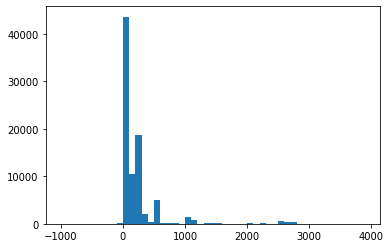

In [82]:
# Analyze the distribution of the numeric 2016_dollars column
print('range: {}, {}'.format(df2['2016_dollars'].min(), df2['2016_dollars'].max()))
plt.hist(df2['2016_dollars'], bins=[100 * (i-10) for i in range(50)])

#### We see here that using a scaling mapping everything into [0,1] would compress all inliers into a small range with outliers farther out, so this would make it easier for the neural net to determine whether someone contributed a lot of money or not. On the other hand there are some people in the middle contributing modest amounts ($250-1000), so perhaps the usual z-score standardization could work; also there are negative values indicating refunds.

#### Now we train the model, encoding all categorical features 1-hot, and converting the DataFrames into their numpy array base representations.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# Data ready to be put into model
df_final = df2.copy()
# drop nonessential columns
# Note: CMTE_PTY is highly correlated with the target, and the neural net learns to just predict cmte_pty for the target,
# resulting in 99%+ cross-validated accuracy.
df_final = df_final.drop(['cmte_pty', 'cand_office', 'transaction_pgi', 'employer', 'classification'], axis=1)
# make cycle an int
df_final = df_final.astype({'cycle': np.int})
_X = df_final.to_numpy()
print(_X)
# extract the target
_y = _X[:, 0].copy()
# separate out the covariates
_X = np.delete(_X, 0, axis = 1)
print(_X)
print(_y)
# one-hot all non-numeric covariates
_X_left = OneHotEncoder().fit_transform(_X[:, :-1]).todense()
# rejoin the last column (2016_dollars), the only numeric covariate, as a float
X = np.concatenate((_X_left, _X[:, -1:]), axis=1)
# label-encode the target so the neural net will understand and have an output layer of 7 nodes
y = LabelEncoder().fit_transform(_y)
print(X)
print(np.unique(y))

# define the transforms: use Column transformer to only scale the last column of the training/validation data.
# For now, fix the NN to have 1 hidden layer with 100 nodes, using 'adam' instead of batch sgd.
scale_floats = ColumnTransformer([
    ('scale', StandardScaler(), X.shape[1]-1)
], remainder='passthrough')
params = {'ffnet__activation': ('relu', 'sigmoid')}

pipeline = Pipeline(steps=[('scaler', scale_floats), ('ffnet', MLPClassifier())])

[['IND' 'NY' 'ENGINEER' 2010 566.61]
 ['IND' 'LA' 'ENGINEER' 2010 336.6]
 ['IND' 'LA' 'ENGINEER' 2010 327.9]
 ...
 ['REP' 'NC' 'ENGINEERING MANAGER' 2012 261.25]
 ['REP' 'MI' 'CHEMIST' 2012 229.9]
 ['REP' 'UT' 'CHEMIST' 2012 1045.0]]
[['NY' 'ENGINEER' 2010 566.61]
 ['LA' 'ENGINEER' 2010 336.6]
 ['LA' 'ENGINEER' 2010 327.9]
 ...
 ['NC' 'ENGINEERING MANAGER' 2012 261.25]
 ['MI' 'CHEMIST' 2012 229.9]
 ['UT' 'CHEMIST' 2012 1045.0]]
['IND' 'IND' 'IND' ... 'REP' 'REP' 'REP']
[[0.0 0.0 0.0 ... 0.0 0.0 566.61]
 [0.0 0.0 0.0 ... 0.0 0.0 336.6]
 [0.0 0.0 0.0 ... 0.0 0.0 327.9]
 ...
 [0.0 0.0 0.0 ... 1.0 0.0 261.25]
 [0.0 0.0 0.0 ... 1.0 0.0 229.9]
 [0.0 0.0 0.0 ... 1.0 0.0 1045.0]]
[0 1 2 3 4 5 6]


In [29]:
# Train and assess accuracy. This took 1 hour of compute time on a single node/core on my machine.
cross_val_score(GridSearchCV(pipeline, param_grid=params, cv=5, verbose = 2), X, y=y, cv=5, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.7min
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ........................... ffnet__activation=relu, total= 2.0min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.7min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.2min finished


[CV] ................................................. , total=11.5min
[CV]  ................................................................
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.1min finished


[CV] ................................................. , total=11.4min
[CV]  ................................................................
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 2.0min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 2.1min
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.7min finished


[CV] ................................................. , total=12.2min
[CV]  ................................................................
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.8min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.2s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.2s
[CV] ffnet__activation=sigmoid .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.5min finished


[CV] ................................................. , total=11.9min
[CV]  ................................................................
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... ffnet__activation=relu, total= 2.0min
[CV] ffnet__activation=relu ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 1.9min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 2.1min
[CV] ffnet__activation=relu ..........................................
[CV] ........................... ffnet__activation=relu, total= 2.0min
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   0.9s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] ........................ ffnet__activation=sigmoid, total=   1.0s
[CV] ffnet__activation=sigmoid .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.0min finished


[CV] ................................................. , total=12.3min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 59.4min finished


array([0.90325991, 0.88633694, 0.91124295, 0.90243186, 0.88034539])

In [30]:
Out[29].mean()

0.8967234109502831

#### 89.67% accuracy using a Feed-forward neural net with 1 hidden layer of 100 nodes (5-5 fold cv, optimized for RELU or Sigmoid activation in the inner folds) 
#### TODO: report f-measure (high accuracy is likely due to overpredicting DEM since Democrats are overly represented in the dataset), could train on a more uniformly chosen set of records